In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

In [4]:
Original_data = pd.read_csv("Resources/cscpopendata.csv")
Original_data.head(50)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
5,6,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),48,...,13463-67-7,9,Titanium dioxide,07/09/2009,08/28/2013,11/01/2010,07/09/2009,07/09/2009,NaN,1
6,7,ABSOLUTE Precision Color Powder System - All S...,310.0,5858-81-1,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,07/13/2009,12/30/2010,NaN,12/04/2009,12/04/2009,NaN,1
7,7,ABSOLUTE Precision Color Powder System - All S...,311.0,D&C RED 7 CALCIUM LAKE,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,07/13/2009,12/30/2010,NaN,12/04/2009,12/04/2009,NaN,1
8,7,ABSOLUTE Precision Color Powder System - All S...,312.0,D&C RED 28,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,07/13/2009,12/30/2010,NaN,12/04/2009,12/04/2009,NaN,1
9,8,ABSOLUTE Precision Color Powder System Opaque ...,313.0,D&C RED 7 CALCIUM LAKE,11,OPI PRODUCTS INC.,ABSOLUTE,59,Nail Products,60,...,13463-67-7,17903,Titanium dioxide,07/13/2009,12/30/2010,NaN,06/09/2010,06/09/2010,NaN,1


In [5]:
#minimizing the data frame
original_df = Original_data[["ProductName", "CSF", "CompanyName", "BrandName", "PrimaryCategory",
                             "CasNumber", "ChemicalId", "ChemicalName", "InitialDateReported", "MostRecentDateReported",
                             "DiscontinuedDate", "ChemicalCreatedAt", "ChemicalUpdatedAt", "ChemicalDateRemoved", "ChemicalCount"]]
original_df.head()

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [6]:
original_df.shape

(114635, 15)

In [7]:
print(original_df.dtypes)

ProductName               object
CSF                       object
CompanyName               object
BrandName                 object
PrimaryCategory           object
CasNumber                 object
ChemicalId                 int64
ChemicalName              object
InitialDateReported       object
MostRecentDateReported    object
DiscontinuedDate          object
ChemicalCreatedAt         object
ChemicalUpdatedAt         object
ChemicalDateRemoved       object
ChemicalCount              int64
dtype: object


In [8]:
original_df['InitialDateReported'] = pd.to_datetime(original_df['InitialDateReported'])
original_df['MostRecentDateReported'] = pd.to_datetime(original_df['MostRecentDateReported'])
original_df['DiscontinuedDate'] = pd.to_datetime(original_df['DiscontinuedDate'])
original_df['ChemicalCreatedAt'] = pd.to_datetime(original_df['ChemicalCreatedAt'])
original_df['ChemicalUpdatedAt'] = pd.to_datetime(original_df['ChemicalUpdatedAt'])
original_df['ChemicalDateRemoved'] = pd.to_datetime(original_df['ChemicalDateRemoved'])
original_df.dtypes

ProductName                       object
CSF                               object
CompanyName                       object
BrandName                         object
PrimaryCategory                   object
CasNumber                         object
ChemicalId                         int64
ChemicalName                      object
InitialDateReported       datetime64[ns]
MostRecentDateReported    datetime64[ns]
DiscontinuedDate          datetime64[ns]
ChemicalCreatedAt         datetime64[ns]
ChemicalUpdatedAt         datetime64[ns]
ChemicalDateRemoved       datetime64[ns]
ChemicalCount                      int64
dtype: object

In [9]:
original_df.head()

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,6,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
1,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),65996-92-1,4,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2
2,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),140-67-0,5,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,7,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,8,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1


In [10]:
#couting the chemicals 
original_df["ChemicalName"].value_counts()

ChemicalName
Titanium dioxide                                                                                       93480
Silica, crystalline (airborne particles of respirable size)                                             2817
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     2154
Mica                                                                                                    1919
Butylated hydroxyanisole                                                                                1888
                                                                                                       ...  
Acetylsalicylic acid                                                                                       1
2-Propyleneacrolein                                                                                        1
Spironolactone                                                                                             1
Extrac

In [11]:
original_df["ChemicalCount"].describe()

count    114635.000000
mean          1.288359
std           0.636418
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: ChemicalCount, dtype: float64

In [12]:
len(original_df["ProductName"])

114635

In [13]:
original_df[original_df.duplicated()]

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
65,Gel Polishes,moonshine,"McConnell Labs, Inc.",Light Elegance,Nail Products,13463-67-7,54,Titanium dioxide,2009-08-25,2010-12-30,NaT,2009-08-25,2009-08-25,NaT,1
67,Gel Polishes,sugar shack,"McConnell Labs, Inc.",Light Elegance,Nail Products,13463-67-7,54,Titanium dioxide,2009-08-25,2010-12-30,NaT,2009-08-25,2009-08-25,NaT,1
69,Gel Polishes,sweet cheeks,"McConnell Labs, Inc.",Light Elegance,Nail Products,13463-67-7,54,Titanium dioxide,2009-08-25,2010-12-30,NaT,2009-08-25,2009-08-25,NaT,1
71,Gel Polishes,tahitian tingle,"McConnell Labs, Inc.",Light Elegance,Nail Products,13463-67-7,54,Titanium dioxide,2009-08-25,2010-12-30,NaT,2009-08-25,2009-08-25,NaT,1
73,Gel Polishes,time for tea,"McConnell Labs, Inc.",Light Elegance,Nail Products,13463-67-7,54,Titanium dioxide,2009-08-25,2010-12-30,NaT,2009-08-25,2009-08-25,NaT,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114532,Cutie Bento Creamy Lip & Cheek Duo 01 Juicy Wa...,01 Juicy Watermelon,Memebox Corporation,Kaja,Makeup Products (non-permanent),13463-67-7,67995,Titanium dioxide,2020-05-21,2020-05-21,NaT,2020-05-21,2020-05-21,NaT,1
114534,Cutie Bento Creamy Lip & Cheek Duo 01 Juicy Wa...,Pink Cloud,Memebox Corporation,Kaja,Makeup Products (non-permanent),13463-67-7,67993,Titanium dioxide,2020-05-21,2020-05-21,NaT,2020-05-21,2020-05-21,NaT,1
114536,Cutie Bento Creamy Lip & Cheek Duo 01 Juicy Wa...,Vivid Papaya,Memebox Corporation,Kaja,Makeup Products (non-permanent),13463-67-7,67994,Titanium dioxide,2020-05-21,2020-05-21,NaT,2020-05-21,2020-05-21,NaT,1
114538,Cutie Bento Creamy Lip & Cheek Duo 02 Sweet Sa...,Rose Drops,Memebox Corporation,Kaja,Makeup Products (non-permanent),13463-67-7,67996,Titanium dioxide,2020-05-21,2020-05-21,NaT,2020-05-21,2020-05-21,NaT,1


## plotting


In [14]:
# Top 31 company that was menioned the most in our CSV.
company_counts = original_df['CompanyName'].value_counts().reset_index()
company_counts.columns = ['CompanyName', 'Count']
companies_over_1035 = company_counts[company_counts['Count'] >= 1035]
companies_over_1035


,CompanyName,Count
0,L'Oreal USA,5747
1,S+,5165
2,Coty,5162
3,Revlon Consumer Product Corporation,4341
4,"Bare Escentuals Beauty, Inc.",3828
5,The Procter & Gamble Company,3535
6,"NYX Los Angeles, Inc.",3227
7,Charlotte Tilbury Beauty Ltd,2770
8,Tarte Cosmetics,2497
9,Victoria's Secret Beauty,2219


In [15]:
# Top 31 chemicals that were mentioned the most in our CSV. 
chemical_count = original_df['ChemicalName'].value_counts().reset_index()
chemical_count.columns = ['ChemicalName', 'Count']
chemicals_over_71 = chemical_count[chemical_count['Count'] >= 71]
chemicals_over_71

,ChemicalName,Count
0,Titanium dioxide,93480
1,"Silica, crystalline (airborne particles of res...",2817
2,"Retinol/retinyl esters, when in daily dosages ...",2154
3,Mica,1919
4,Butylated hydroxyanisole,1888
5,Carbon black,1758
6,Talc,1549
7,Cocamide diethanolamine,1397
8,Retinyl palmitate,1181
9,Vitamin A palmitate,971


In [16]:
#cleaning the names of chemicals.
chemicals_over_71['ChemicalName'] = chemicals_over_71['ChemicalName'].replace({
    "Isopropyl alcohol manufacture using strong acids" : "Isopropyl alcohol", 
    "Silica, crystalline (airborne particles of respirable size)" : "Silica", 
    "Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents." : "Daily dosages of Retinol/retinyl esters",
    "Carbon black (airborne, unbound particles of respirable size)" : "Carbon black",
    "Mineral oils, untreated and mildly treated	" : "Mineral oils"}
    
    


)
chemicals_over_71

,ChemicalName,Count
0,Titanium dioxide,93480
1,Silica,2817
2,Daily dosages of Retinol/retinyl esters,2154
3,Mica,1919
4,Butylated hydroxyanisole,1888
5,Carbon black,1758
6,Talc,1549
7,Cocamide diethanolamine,1397
8,Retinyl palmitate,1181
9,Vitamin A palmitate,971


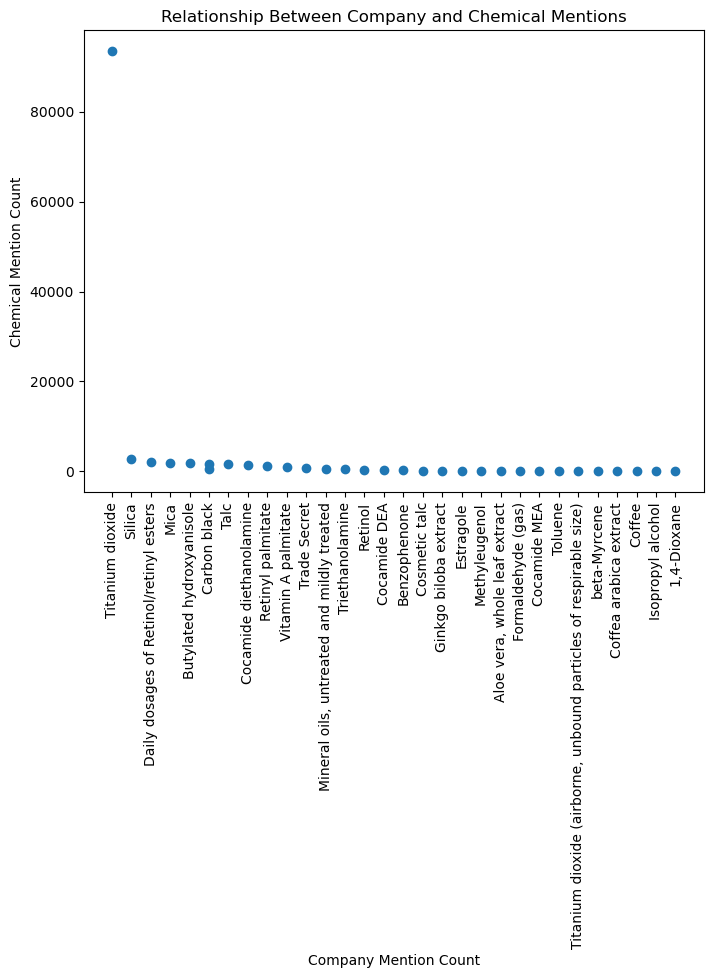

In [68]:
#scatter plot that shows the relationship between the company and chemical mentions count. 
plt.figure(figsize=(8, 6))
plt.scatter(chemicals_over_71["ChemicalName"], chemicals_over_71["Count"])
plt.xlabel('Company Mention Count')
plt.ylabel('Chemical Mention Count')
plt.title('Relationship Between Company and Chemical Mentions')
plt.xticks(rotation=90)
plt.show()

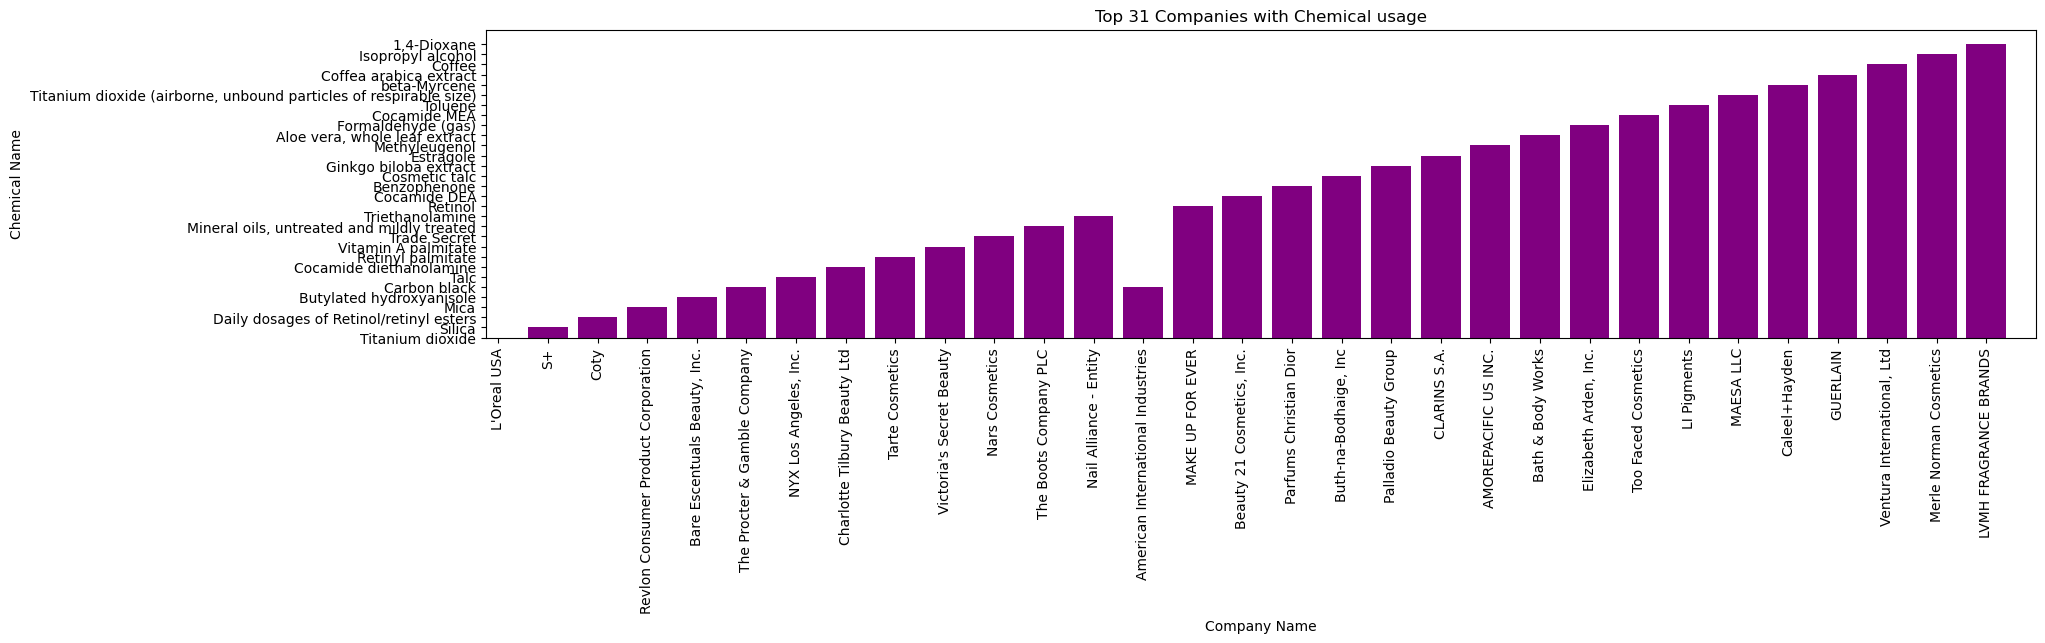

In [18]:
# Bar chart that explains the amount of chemical usages per the 31st companies that were mentioned the most. 
plt.figure(figsize=(20,4))

top_companies = plt.bar(companies_over_1035["CompanyName"], chemicals_over_71["ChemicalName"], color="purple")
# top_chemicals, = plt.bar(chemicals_over_71["ChemicalName"], chemicals_over_71["Count"])

plt.xlabel('Company Name')
plt.ylabel('Chemical Name')
plt.title('Top 31 Companies with Chemical usage')
plt.xlim(-0.25, len(top_companies))
# plt.ylim(0, max(rain_df["Inches"])+10)
plt.xticks(rotation=90)
plt.show()

In [76]:
#filtering data based on the most used chemical which is Titanium Dioxide.
Titanium = Original_data.loc[Original_data["ChemicalName"]=="Titanium dioxide"]
Titanium.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
5,6,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),48,...,13463-67-7,9,Titanium dioxide,07/09/2009,08/28/2013,11/01/2010,07/09/2009,07/09/2009,NaN,1
6,7,ABSOLUTE Precision Color Powder System - All S...,310.0,5858-81-1,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,07/13/2009,12/30/2010,NaN,12/04/2009,12/04/2009,NaN,1


In [84]:
Titanium.shape

(93480, 22)

In [83]:
groupby_data = Titanium.groupby("CompanyName")["ChemicalName"].size().reset_index()
groupby_data

,CompanyName,ChemicalName
0,2355644 Ontario Inc.,1
1,ACQUA DI PARMA,9
2,AFFLINK,1
3,"ALBION COSMETICS (America), Inc.",4
4,ALPHAEON Corporation,4
...,...,...
451,"eos Products, LLC",12
452,label.m USA INC,4
453,laboratoire Sintyl SA,12
454,purminerals,192


In [85]:
#filering data based on the 22 top companies with the highest titanuim dioxide count.
Titanium_count = groupby_data.value_counts().reset_index()
Titanium_count.head(30)
# Top_22_companies_using_titanium_dioxide = Titanium_count[Titanium_count["count"] >= 1010]
# Top_22_companies_using_titanium_dioxide

,CompanyName,ChemicalName,count
0,2355644 Ontario Inc.,1,1
1,Parfums Nina Ricci,7,1
2,Parfums Christian Dior,1561,1
3,Palladio Beauty Group,758,1
4,Paco Rabanne Parfums,4,1
5,Pacific World Cosmetics,83,1
6,Pacha Soap Co.,4,1
7,PRESCRIPTIVES INC.,225,1
8,PPP&C Inc.,3,1
9,PBIGROUP INC,18,1


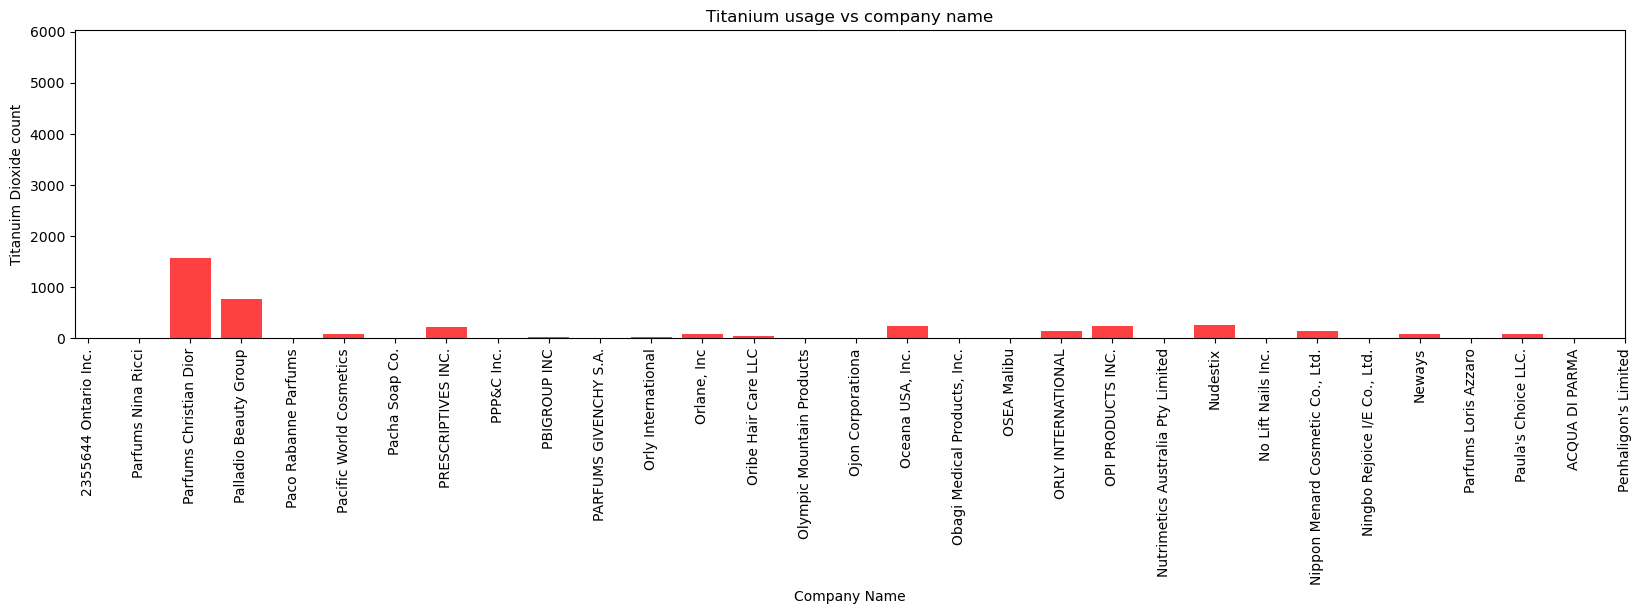

In [86]:
plt.figure(figsize=(20,4))

plt.bar(Titanium_count["CompanyName"],Titanium_count["ChemicalName"], color="red", alpha=0.75)

# top_companies = plt.bar(Top_22_companies_using_titanium_dioxide["CompanyName"], Top_22_companies_using_titanium_dioxide["ChemicalName"], color="purple")
# top_companies2 = plt.bar(Top_22_companies_using_titanium_dioxide["CompanyName"], Top_22_companies_using_titanium_dioxide["count"], color="red", alpha=0.75)

plt.xlabel('Company Name')
plt.ylabel('Titanuim Dioxide count')
plt.title('Titanium usage vs company name')
plt.xlim(-0.25, len(top_companies))
# plt.ylim(0, max(rain_df["Inches"])+10)
plt.xticks(rotation=90)
plt.show()

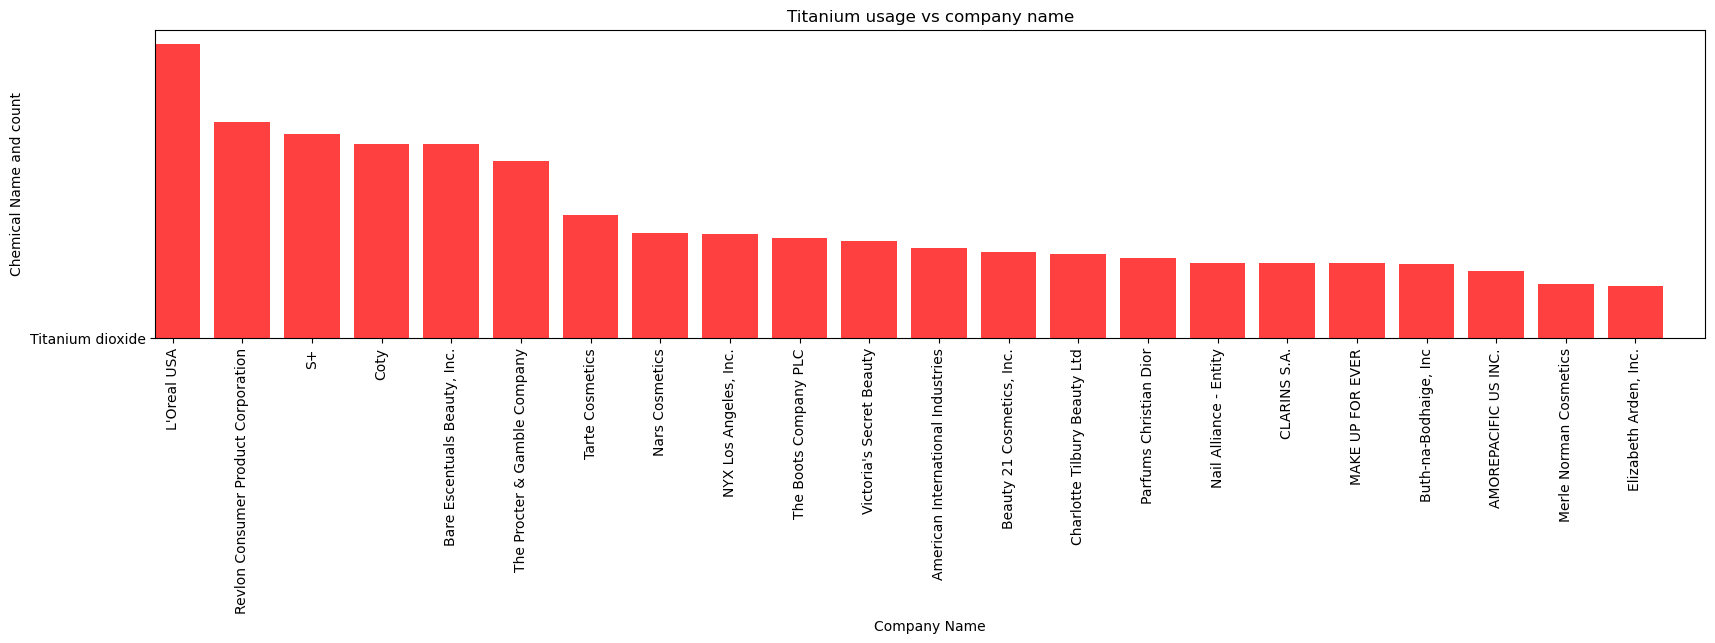

In [22]:
plt.figure(figsize=(20,4))

top_companies = plt.bar(Top_22_companies_using_titanium_dioxide["CompanyName"], Top_22_companies_using_titanium_dioxide["ChemicalName"], color="purple")
top_companies2 = plt.bar(Top_22_companies_using_titanium_dioxide["CompanyName"], Top_22_companies_using_titanium_dioxide["count"], color="red", alpha=0.75)

plt.xlabel('Company Name')
plt.ylabel('Chemical Name and count')
plt.title('Titanium usage vs company name')
plt.xlim(-0.25, len(top_companies))
# plt.ylim(0, max(rain_df["Inches"])+10)
plt.xticks(rotation=90)
plt.show()

In [23]:
chemical_count = original_df['ChemicalName'].value_counts().reset_index()
chemical_count.columns = ['ChemicalName', 'Count']
chemicals_less_93480 = chemical_count[(chemical_count['Count'] >= 71) & (chemical_count['Count'] < 93480)]
chemicals_less_93480

,ChemicalName,Count
1,"Silica, crystalline (airborne particles of res...",2817
2,"Retinol/retinyl esters, when in daily dosages ...",2154
3,Mica,1919
4,Butylated hydroxyanisole,1888
5,Carbon black,1758
6,Talc,1549
7,Cocamide diethanolamine,1397
8,Retinyl palmitate,1181
9,Vitamin A palmitate,971
10,Trade Secret,668


In [24]:
company_counts = original_df['CompanyName'].value_counts().reset_index()
company_counts.columns = ['CompanyName', 'Count']
companies_less_5747 = company_counts[(company_counts['Count'] >= 1035) & (company_counts['Count'] < 5747)]
companies_less_5747

,CompanyName,Count
1,S+,5165
2,Coty,5162
3,Revlon Consumer Product Corporation,4341
4,"Bare Escentuals Beauty, Inc.",3828
5,The Procter & Gamble Company,3535
6,"NYX Los Angeles, Inc.",3227
7,Charlotte Tilbury Beauty Ltd,2770
8,Tarte Cosmetics,2497
9,Victoria's Secret Beauty,2219
10,Nars Cosmetics,2189


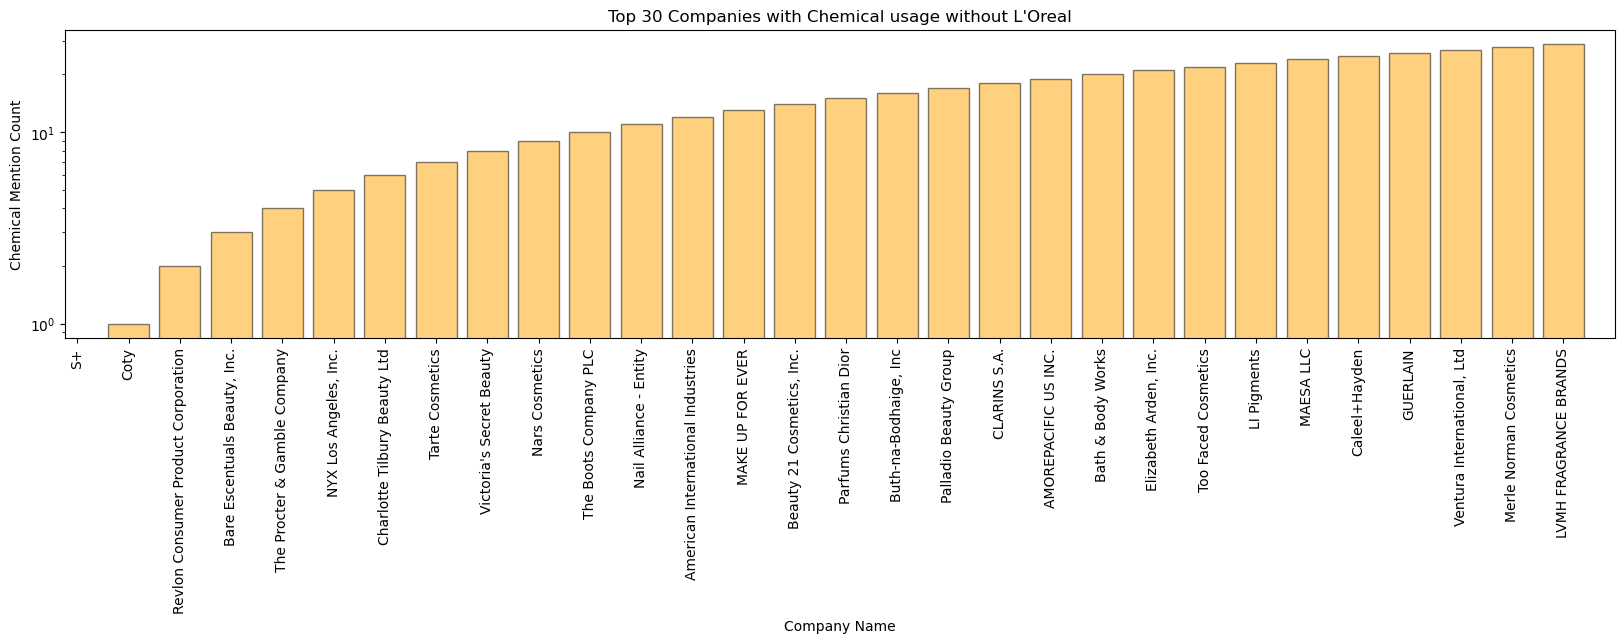

In [25]:
plt.figure(figsize=(20,4))

top_companies = plt.bar(companies_less_5747["CompanyName"], chemicals_less_93480["ChemicalName"], color="orange", log=True, align='center', alpha=0.5, edgecolor='k')
# top_chemicals, = plt.bar(chemicals_over_71["ChemicalName"], chemicals_over_71["Count"])

plt.xlabel('Company Name')
plt.ylabel('Chemical Mention Count')
plt.title("Top 30 Companies with Chemical usage without L'Oreal")
plt.xlim(-0.25, len(top_companies))
plt.xticks(rotation=90)
plt.show()

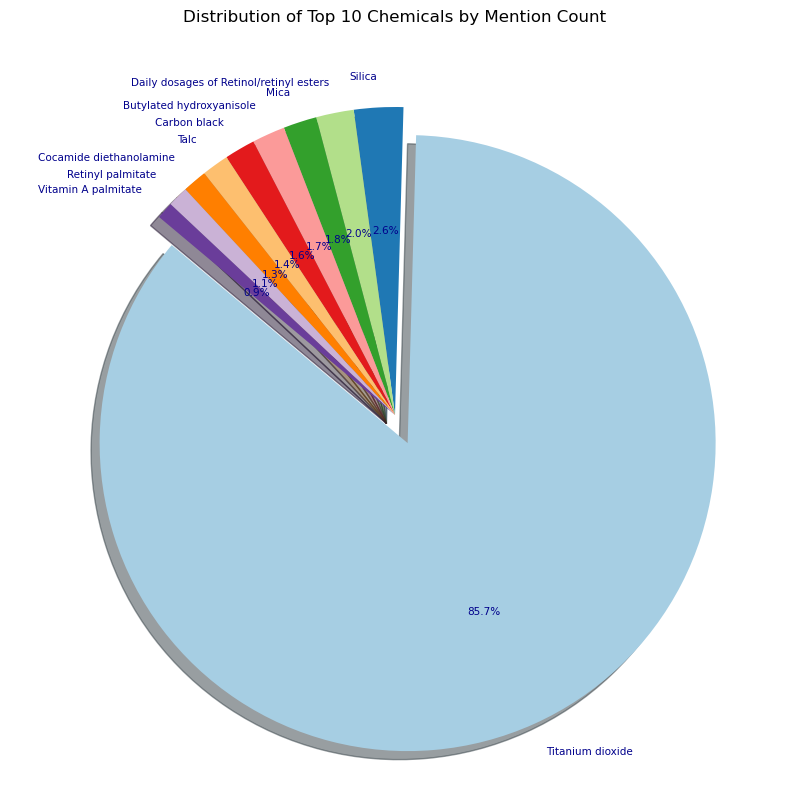

In [26]:
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
chemical_names = chemicals_over_71["ChemicalName"]
chemical_counts = chemicals_over_71["Count"]
top_chemicals = chemical_names[:10]  # Top 10 chemicals
top_chemical_counts = chemical_counts[:10]  # Counts for top 10

plt.figure(figsize=(12, 10))
plt.pie(top_chemical_counts, labels=top_chemicals, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, explode=explode, shadow=True, textprops={'fontsize': 7.5, 'color': 'darkblue'})
plt.title('Distribution of Top 10 Chemicals by Mention Count')
plt.size = "equal"
plt.show()

In [27]:
Original_data.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [28]:
baby_products = Original_data.loc[Original_data["PrimaryCategory"]=="Baby Products"]
baby_products.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
6604,2015,BubbleGum Bubbles No Tears Shampoo,NaN,NaN,120,"Farouk Systems, Inc.",BioSilk,1,Baby Products,3,...,0,0,Trade Secret,09/30/2009,09/30/2009,NaN,09/30/2009,10/13/2009,10/13/2009,0
12980,3083,Jasmine Tea Shower Gel,NaN,NaN,77,"Buth-na-Bodhaige, Inc",The Body Shop,1,Baby Products,158,...,68603-42-9,5136,Cocamide diethanolamine,10/09/2009,02/11/2011,02/11/2011,10/09/2009,10/09/2009,NaN,1
12981,3084,Nectarine & Plum Bath & Shower Gel,NaN,NaN,77,"Buth-na-Bodhaige, Inc",The Body Shop,1,Baby Products,158,...,68603-42-9,5139,Cocamide diethanolamine,10/09/2009,02/11/2011,02/11/2011,10/09/2009,10/09/2009,NaN,1
14178,3195,Baby Don't Cry Shampoo,22468.0,Fragrance/parfum,174,John Paul Mitchell Systems,John Paul Mitchell Systems,1,Baby Products,3,...,100-42-5,5734,Styrene,10/09/2009,12/30/2010,NaN,10/09/2009,10/09/2009,NaN,1
15001,3450,Nature's Gate Organics Baby Soothing Diaper Ra...,NaN,NaN,1232,LEVLAD LLC,Nature's Gate,1,Baby Products,4,...,79-81-2,6155,"Retinol/retinyl esters, when in daily dosages ...",10/12/2009,06/27/2019,05/31/2009,10/12/2009,10/12/2009,NaN,1


In [51]:
baby_products_df = baby_products[["CompanyName", "PrimaryCategory", "ChemicalName","DiscontinuedDate", "ChemicalDateRemoved", "ChemicalCount"]]
baby_products_df.head(50)

,CompanyName,PrimaryCategory,ChemicalName,DiscontinuedDate,ChemicalDateRemoved,ChemicalCount
6604,"Farouk Systems, Inc.",Baby Products,Trade Secret,NaN,10/13/2009,0
12980,"Buth-na-Bodhaige, Inc",Baby Products,Cocamide diethanolamine,02/11/2011,NaN,1
12981,"Buth-na-Bodhaige, Inc",Baby Products,Cocamide diethanolamine,02/11/2011,NaN,1
14178,John Paul Mitchell Systems,Baby Products,Styrene,NaN,NaN,1
15001,LEVLAD LLC,Baby Products,"Retinol/retinyl esters, when in daily dosages ...",05/31/2009,NaN,1
19139,Harmon Stores Inc.,Baby Products,Cadmium and cadmium compounds,NaN,NaN,2
19140,Harmon Stores Inc.,Baby Products,Lead,NaN,NaN,2
20078,"Chattem, Inc.",Baby Products,"Retinol/retinyl esters, when in daily dosages ...",NaN,NaN,1
20083,"Chattem, Inc.",Baby Products,"Retinol/retinyl esters, when in daily dosages ...",NaN,NaN,1
20084,"Chattem, Inc.",Baby Products,"Retinol/retinyl esters, when in daily dosages ...",NaN,NaN,1


In [54]:
baby_products_df['ChemicalName'] = baby_products_df['ChemicalName'].replace({
    "Cadmium and cadmium compounds" : "Cadmium", 
    "Silica, crystalline (airborne particles of respirable size)" : "Silica", 
    "Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents." : "Daily dosages of Retinol/retinyl esters"})
baby_products_df.head(10)

,CompanyName,PrimaryCategory,ChemicalName,DiscontinuedDate,ChemicalDateRemoved,ChemicalCount
6604,"Farouk Systems, Inc.",Baby Products,Trade Secret,NaN,10/13/2009,0
12980,"Buth-na-Bodhaige, Inc",Baby Products,Cocamide diethanolamine,02/11/2011,NaN,1
12981,"Buth-na-Bodhaige, Inc",Baby Products,Cocamide diethanolamine,02/11/2011,NaN,1
14178,John Paul Mitchell Systems,Baby Products,Styrene,NaN,NaN,1
15001,LEVLAD LLC,Baby Products,Daily dosages of Retinol/retinyl esters,05/31/2009,NaN,1
19139,Harmon Stores Inc.,Baby Products,Cadmium,NaN,NaN,2
19140,Harmon Stores Inc.,Baby Products,Lead,NaN,NaN,2
20078,"Chattem, Inc.",Baby Products,Daily dosages of Retinol/retinyl esters,NaN,NaN,1
20083,"Chattem, Inc.",Baby Products,Daily dosages of Retinol/retinyl esters,NaN,NaN,1
20084,"Chattem, Inc.",Baby Products,Daily dosages of Retinol/retinyl esters,NaN,NaN,1


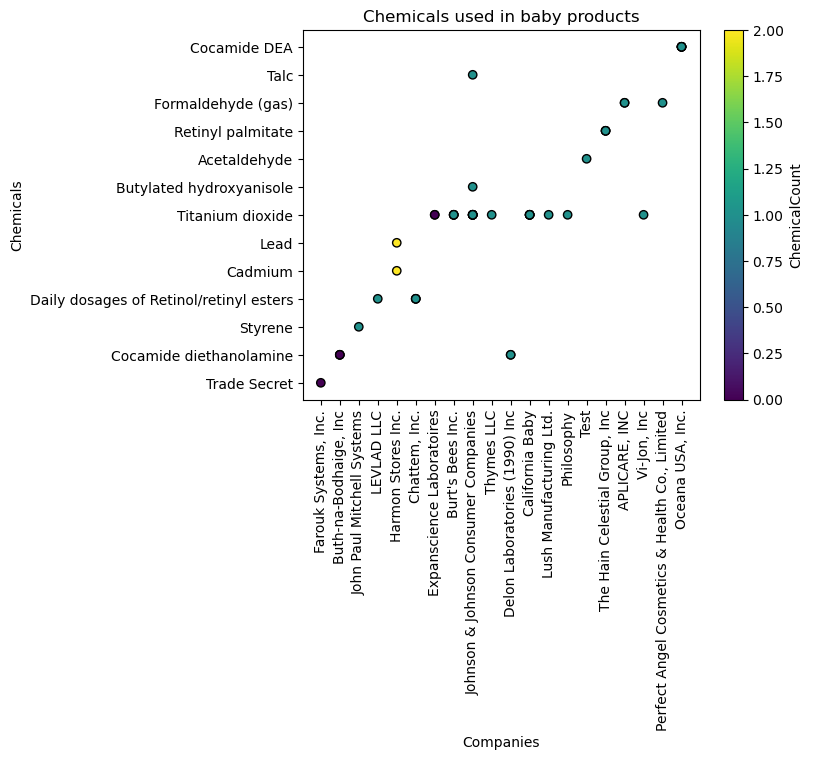

In [67]:
plt.scatter(baby_products_df["CompanyName"], baby_products_df["ChemicalName"], c=baby_products_df["ChemicalCount"], facecolors="red", edgecolors="black")

plt.xticks(rotation=90)
plt.xlabel("Companies")
plt.ylabel("Chemicals")
plt.title("Chemicals used in baby products")
clb = plt.colorbar()
clb.set_label("ChemicalCount")
plt.show()


In [33]:
number_of_baby_products = len(baby_products_df)
number_of_baby_products

49

In [34]:
np.arange(0,49)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [47]:
unique_companies = baby_products_df["CompanyName"].value_counts().reset_index()
unique_companies

,CompanyName,count
0,Johnson & Johnson Consumer Companies,9
1,"Oceana USA, Inc.",5
2,California Baby,5
3,Burt's Bees Inc.,4
4,"The Hain Celestial Group, Inc",3
5,"Chattem, Inc.",3
6,"Buth-na-Bodhaige, Inc",3
7,"APLICARE, INC",2
8,Delon Laboratories (1990) Inc,2
9,Expanscience Laboratoires,2
